In [2]:
import pandas as pd
import numpy as np
#
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#
from imblearn.under_sampling import TomekLinks , RandomUnderSampler
from imblearn.over_sampling import SMOTE ,RandomOverSampler
from imblearn.combine import SMOTETomek
#
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


#
from sklearn import metrics
#
import warnings
warnings.filterwarnings('ignore')

In [3]:
# # management Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
path='/content/drive/MyDrive/heart_2020_cleaned.csv'

In [5]:
# management My PC
# path = r'heart_2020_cleaned.csv'

In [6]:
# DataSape History
DataShapeHistory_list = []

# [ Raw X shape , x_train shape ,x_test shape , tech Name , sampling X shape , x_train shape ,x_test shape ]
def GeneratHistory_List(df, x_train ,y_train, method_Name,  x_train_sampling,y_train_sampling):

    Raw_X_shape = df.shape[0]
    Raw_x_train= x_train.shape[0]
    Raw_y_train= y_train.shape[0]


    sampling_y_train = y_train_sampling.shape[0]
    sampling_x_train = x_train_sampling.shape[0]

    if method_Name in ['RandomOverSampler', 'SMOTE']:
        tech_name = 'Over Sampling'
    elif method_Name in ['RandomUnderSampler', 'TomekLinks']:
        tech_name = 'Under Sampling'
    else:
        tech_name = ' Combined Over and Under Sampling '

    DataShapeHistory_list.append(  [tech_name, method_Name, Raw_X_shape, Raw_x_train, Raw_y_train,
                                    sampling_x_train, sampling_y_train])


In [7]:
#  Generate Models
models = {
    "DT":  DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= None, min_samples_leaf= 4, min_samples_split= 2, splitter= 'best'),
    "KNN": KNeighborsClassifier(n_neighbors=3,p= 1, weights= 'distance'),
    "RF":  RandomForestClassifier( max_depth=20,max_features=7),
    "SGD": SGDClassifier(early_stopping=True ,loss='log' ,eta0=0.001, random_state=42),
    "XGB": XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators=200)
}

MODELS_RESULTS = pd.DataFrame(
    columns=['Model', 'Sampling By ','Train Score', 'Test Score', 'Recall', 'Precision', 'f1-score', 'classification_report'])


def test_models(X_train, X_test, y_train, y_test, Sampling_tech):

    for model in models:
        # fit
        fit = models[model].fit(X_train, y_train)
        # sep before output
        print('-'*40)
        print(f' -------------------{model}-------------------')
        print('-'*40)

        # output
        y_pred= fit.predict(X_test)
        report = metrics.classification_report(y_test,y_pred)

        print(report)
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.set_title(model)
        sns.heatmap(metrics.confusion_matrix(y_test, y_pred),
                    annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()

        # data frame of MODELS_RESULTS and save results
        train_score = round(fit.score(X_train, y_train), 3)
        test_score = round(fit.score(X_test, y_test), 3)
        recall = round(metrics.recall_score(y_test, y_pred) * 100, 2)
        precision = round(metrics.precision_score(y_test,y_pred) * 100, 2)
        f1 = round(metrics.f1_score(y_test, y_pred) * 100, 2)

        MODELS_RESULTS.loc[len(MODELS_RESULTS.index)] = [model, Sampling_tech,
                                           train_score, test_score, recall, precision, f1, report]
    # print(results)


In [8]:
# read data
df = pd.read_csv(path ,sep=',',encoding='utf-8')
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
209312,No,33.67,No,No,No,7.0,0.0,No,Female,40-44,White,No,Yes,Very good,6.0,No,No,No
77661,Yes,39.03,No,No,No,10.0,20.0,Yes,Male,75-79,White,No,Yes,Good,8.0,No,No,Yes
134372,No,25.09,No,No,No,0.0,8.0,No,Female,25-29,White,No,Yes,Excellent,8.0,No,No,No
141491,No,22.86,No,No,No,0.0,0.0,No,Female,35-39,White,No,Yes,Excellent,7.0,No,No,No
76197,No,30.90,No,No,No,0.0,3.0,No,Female,35-39,Black,Yes,Yes,Excellent,8.0,No,No,No


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


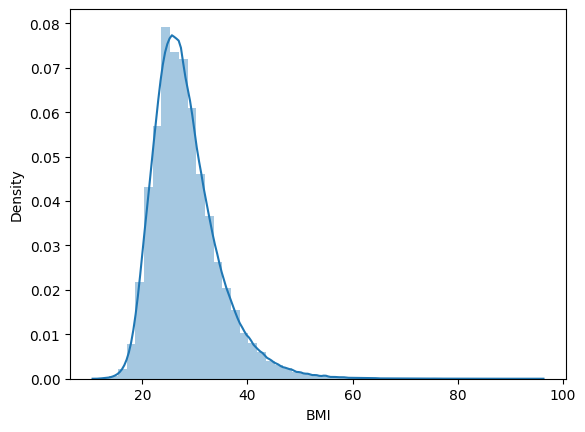

In [11]:
sns.distplot(df["BMI"])
plt.show()


In [12]:
df.describe(include='object').T


,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


## Binning
> Binning BMI for better insights

In [13]:
bins = [0, 18.5, 25, 30, 35, np.inf]
labels = ['Underweight', 'Normal weight',
          'Overweight', 'Obese', 'Extremly Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins, labels=labels)
# df.drop('BMI', axis=1, inplace=True)

df["BMI_Category"].value_counts()


Overweight        114355
Normal weight      97778
Obese              61169
Extremly Obese     41379
Underweight         5114
Name: BMI_Category, dtype: int64

## EDA

In [14]:
fig = go.Figure(data=[go.Pie(labels=df['HeartDisease'], pull=[0.2, 0.2, 0.2])])
fig.show()


> Only there are 8.56% patients that have heart disease


<Axes: xlabel='BMI_Category', ylabel='count'>

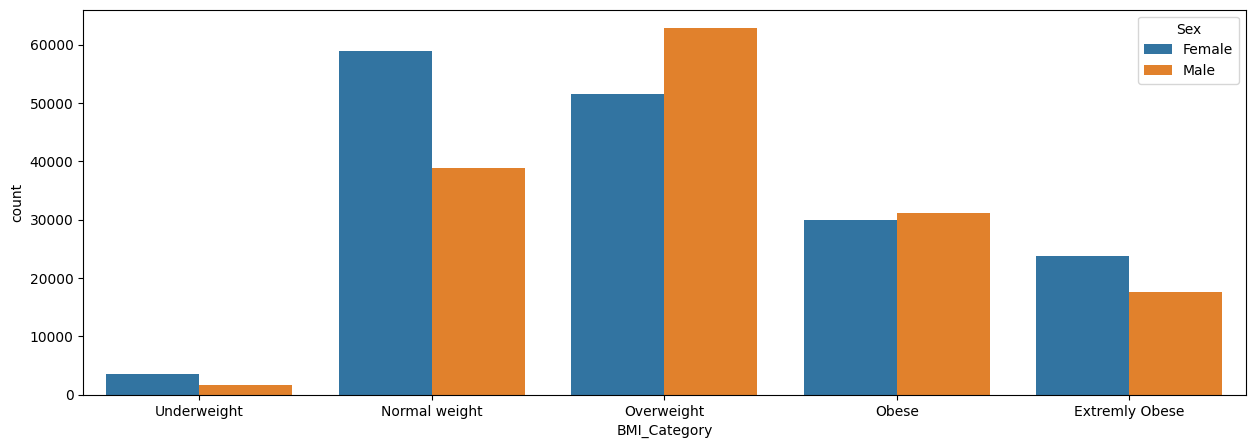

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df["BMI_Category"], hue=df["Sex"])


### The age of patients ?

<Axes: xlabel='AgeCategory', ylabel='count'>

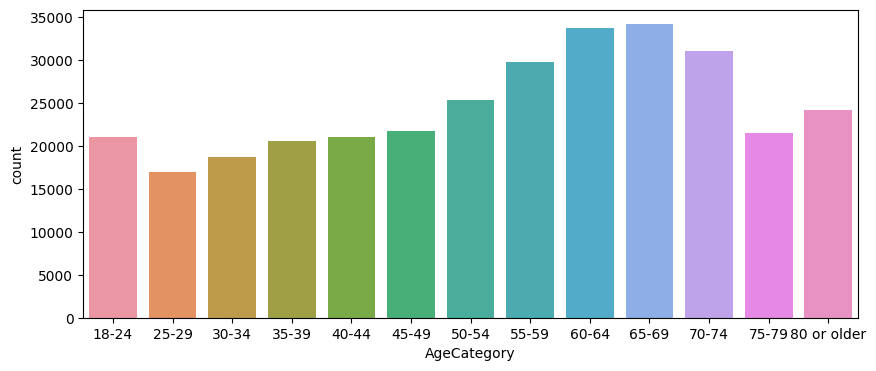

In [16]:
plt.figure(figsize=(10, 4))
sns.countplot(x=df["AgeCategory"].sort_values())


> The most patients age are between 65 to 70 and leat patients age are 25 to 29

### How many patients that have heart disease are smoking ?

Yes    58.586929
No     41.413071
Name: Smoking, dtype: float64


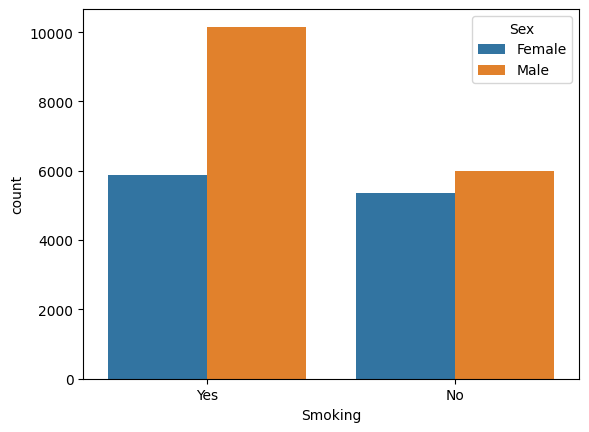

In [17]:
y=df[df["HeartDisease"] =='Yes']
sns.countplot(x =y["Smoking"] ,hue=y["Sex"])

print(y["Smoking"].value_counts() / len(y)*100)


> 58% of patients that have heart disease are smoked at least 100 cigarettes in their entire life

### What is the general health of people that have heart disease ?


Good         34.917620
Fair         25.879516
Very good    19.658057
Poor         14.064955
Excellent     5.479852
Name: GenHealth, dtype: float64


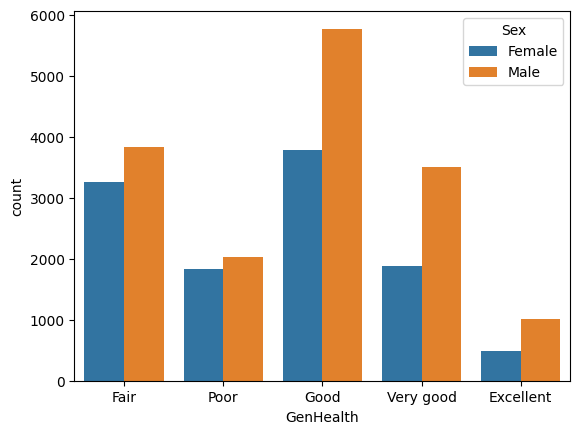

In [18]:
sns.countplot(x = y["GenHealth"] ,hue = y["Sex"])

print(y["GenHealth"].value_counts() / len(y)*100)


### Percentage of men and women with heart disease


In [19]:
px.pie(y, values=np.ones(y.shape[0]), names='Sex')


In [20]:
for i in df.columns:
    if df[i].dtype == type(object):
        print(i, end=': ')
        print('\n', df[i].unique())
        print()


HeartDisease: 
 ['No' 'Yes']

Smoking: 
 ['Yes' 'No']

AlcoholDrinking: 
 ['No' 'Yes']

Stroke: 
 ['No' 'Yes']

DiffWalking: 
 ['No' 'Yes']

Sex: 
 ['Female' 'Male']

AgeCategory: 
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

Race: 
 ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Diabetic: 
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

PhysicalActivity: 
 ['Yes' 'No']

GenHealth: 
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

Asthma: 
 ['Yes' 'No']

KidneyDisease: 
 ['No' 'Yes']

SkinCancer: 
 ['Yes' 'No']



##### first we want to convert [yes, no] column data to numeric [1, 0] but there is data which mean Y/N but written with additional like [No,  borderline diabetes, Yes (during pregnancy)], so we will convert that into [yes, no] first

In [21]:
df.replace('No, borderline diabetes', 'No', inplace=True)
df.replace('Yes (during pregnancy)', 'Yes', inplace=True)

df["Diabetic"].value_counts()


No     276434
Yes     43361
Name: Diabetic, dtype: int64

# Preprocessing

### Missing values

<Axes: >

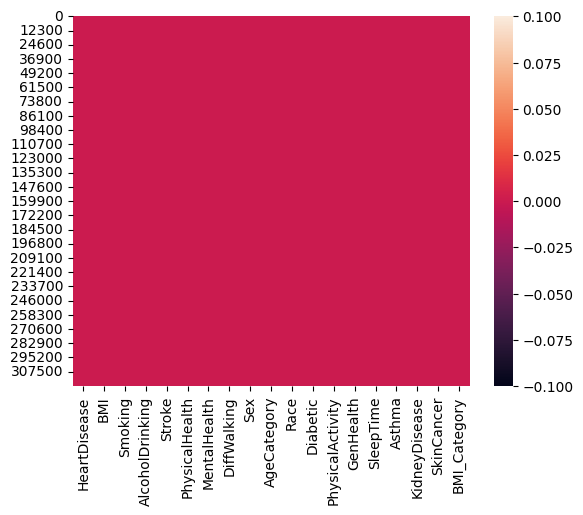

In [22]:
sns.heatmap(df.isnull())


## Outliers

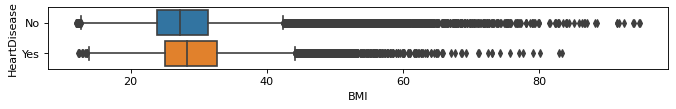

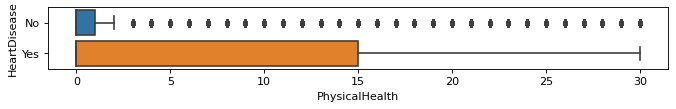

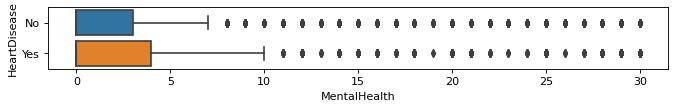

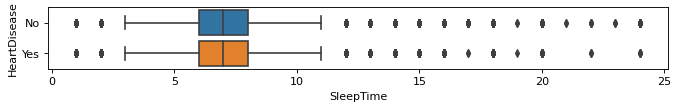

In [23]:
list = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

for i in range(0, len(list)):
    plt.figure(figsize=(10, 1), dpi=80)
    sns.boxplot(x=df[list[i]], y=df['HeartDisease'], data=df, orient="h")
    plt.show()


## Encoding

In [24]:
col_obj = df.select_dtypes('object').columns


le = LabelEncoder()

for col in col_obj:
    df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      319795 non-null  int64   
 1   BMI               319795 non-null  float64 
 2   Smoking           319795 non-null  int64   
 3   AlcoholDrinking   319795 non-null  int64   
 4   Stroke            319795 non-null  int64   
 5   PhysicalHealth    319795 non-null  float64 
 6   MentalHealth      319795 non-null  float64 
 7   DiffWalking       319795 non-null  int64   
 8   Sex               319795 non-null  int64   
 9   AgeCategory       319795 non-null  int64   
 10  Race              319795 non-null  int64   
 11  Diabetic          319795 non-null  int64   
 12  PhysicalActivity  319795 non-null  int64   
 13  GenHealth         319795 non-null  int64   
 14  SleepTime         319795 non-null  float64 
 15  Asthma            319795 non-null  int64   
 16  Ki

In [25]:
df['BMI_Category']=le.fit_transform(df['BMI_Category'])


<Axes: >

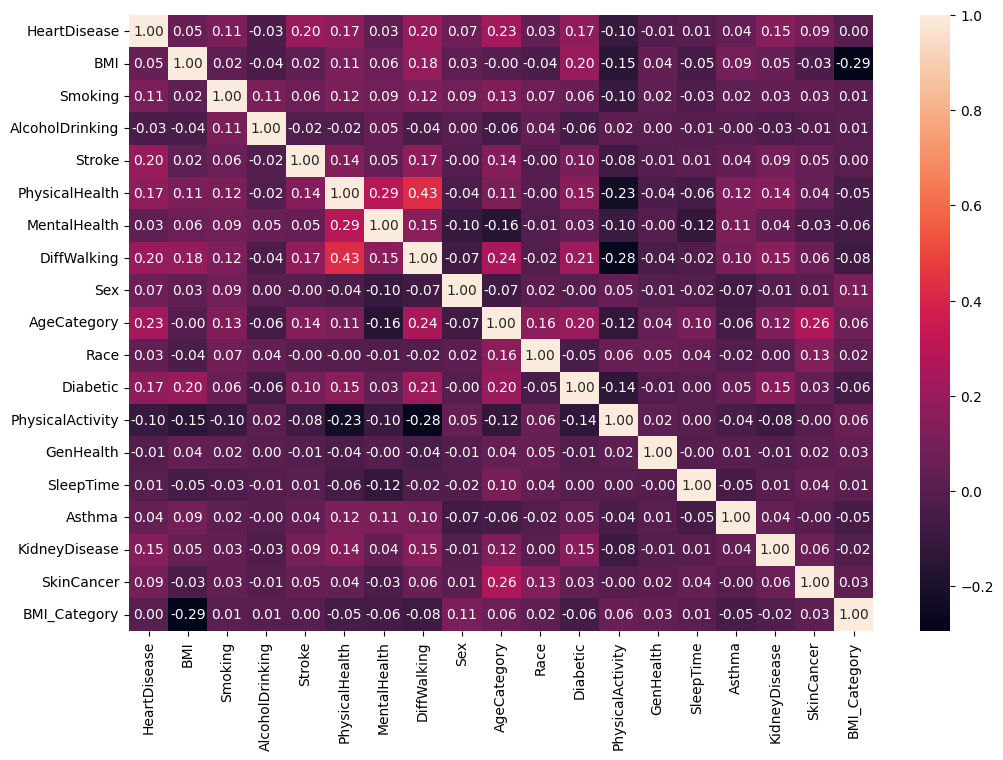

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")


In [27]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'BMI_Category'],
      dtype='object')

## Split Data

In [28]:
X = df.drop(['HeartDisease'], axis=1)
# X = df.drop(['HeartDisease', 'BMI_Category',
#             'AlcoholDrinking', 'Race', 'MentalHealth', 'GenHealth', 'SleepTime',
#              'Asthma', 'PhysicalActivity'], axis=1)
Y = df['HeartDisease']

sc = StandardScaler()
X = sc.fit_transform(X)

print(X.shape,Y.shape,sep='\n')

(319795, 18)
(319795,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, test_size=0.3, random_state=42)

In [30]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape,sep='\n')

(223856, 18)
(95939, 18)
(223856,)
(95939,)


# Models Before Imbalance processing

----------------------------------------
 -------------------DT-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87727
           1       0.47      0.06      0.11      8212

    accuracy                           0.91     95939
   macro avg       0.69      0.53      0.53     95939
weighted avg       0.88      0.91      0.88     95939



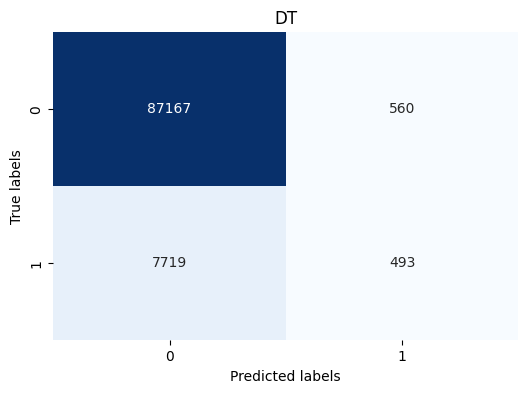

----------------------------------------
 -------------------KNN-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     87727
           1       0.27      0.18      0.22      8212

    accuracy                           0.89     95939
   macro avg       0.60      0.57      0.58     95939
weighted avg       0.87      0.89      0.88     95939



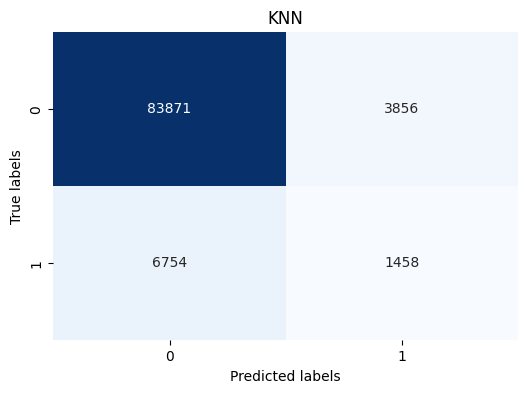

----------------------------------------
 -------------------RF-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87727
           1       0.48      0.10      0.16      8212

    accuracy                           0.91     95939
   macro avg       0.70      0.54      0.56     95939
weighted avg       0.88      0.91      0.89     95939



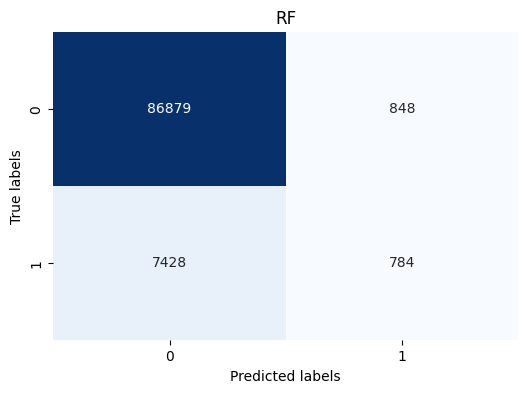

----------------------------------------
 -------------------SGD-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87727
           1       0.52      0.10      0.16      8212

    accuracy                           0.91     95939
   macro avg       0.72      0.54      0.56     95939
weighted avg       0.89      0.91      0.89     95939



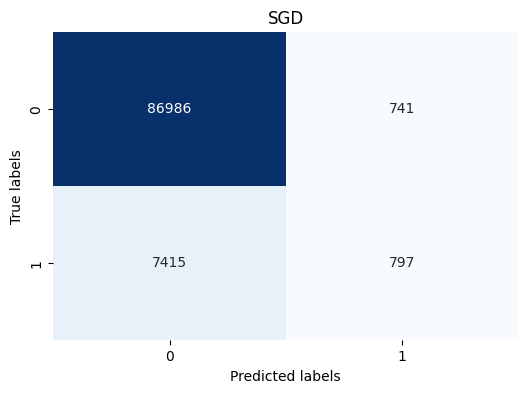

----------------------------------------
 -------------------XGB-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87727
           1       0.53      0.10      0.16      8212

    accuracy                           0.92     95939
   macro avg       0.72      0.54      0.56     95939
weighted avg       0.89      0.92      0.89     95939



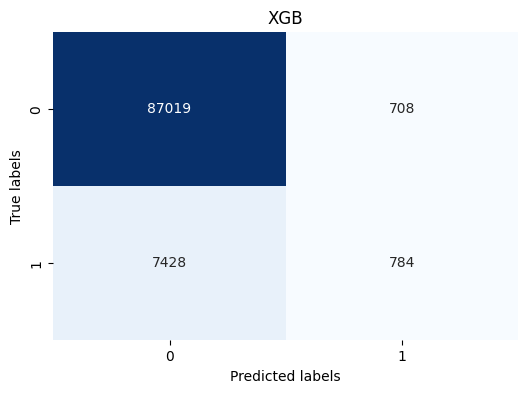

In [31]:
test_models(X_train, X_test, y_train, y_test,'Before Sampling')

## Imbalanced Data

>  A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called 'majority classes'. Those that make up a smaller proportion are 'minority classes'.<br>


<h1>What is effect imbalance data on model ?</h1>
    •	Algorithms may get biased towards the majority class and thus tend to predict output as the majority class.<br>
    •	Minority class observations look like noise to the model and are ignored by the model.<br>
    •	Imbalanced dataset gives misleading accuracy score.<br>
<br >
<hr style='color:#696969 ;width:80%' >

* We have common techniques :


<b>1.Under Sample : </b>

> Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

>Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.



- <b> Some Functions to apply Undersampling :</b>

*  <a>1. Random Under-Sampling With Imblearn.</a>

> is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.


In [32]:
# Sampling Data
rUs = RandomUnderSampler(random_state=42)

rUs_x_train, rUs_y_train = rUs.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', rUs_x_train.shape, " -- ", rUs_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'RandomUnderSampler',rUs_x_train,rUs_y_train)

original dataset shape: (223856, 18)  --  (223856,)
Resample dataset shape (38322, 18)  --  (38322,)


----------------------------------------
 -------------------DT-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87727
           1       0.20      0.79      0.32      8212

    accuracy                           0.71     95939
   macro avg       0.59      0.75      0.57     95939
weighted avg       0.91      0.71      0.78     95939



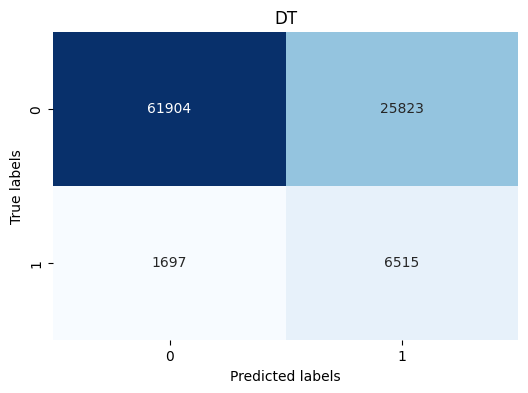

----------------------------------------
 -------------------KNN-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     87727
           1       0.18      0.72      0.28      8212

    accuracy                           0.69     95939
   macro avg       0.57      0.70      0.54     95939
weighted avg       0.90      0.69      0.76     95939



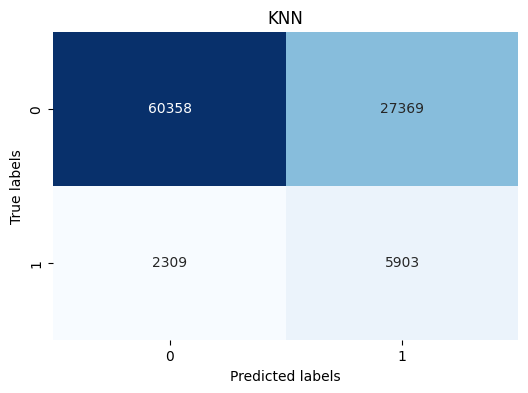

----------------------------------------
 -------------------RF-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87727
           1       0.20      0.79      0.32      8212

    accuracy                           0.72     95939
   macro avg       0.59      0.75      0.57     95939
weighted avg       0.91      0.72      0.78     95939



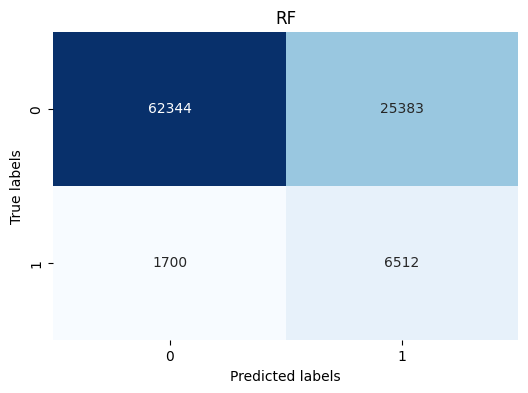

----------------------------------------
 -------------------SGD-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87727
           1       0.20      0.77      0.32      8212

    accuracy                           0.72     95939
   macro avg       0.59      0.74      0.57     95939
weighted avg       0.90      0.72      0.78     95939



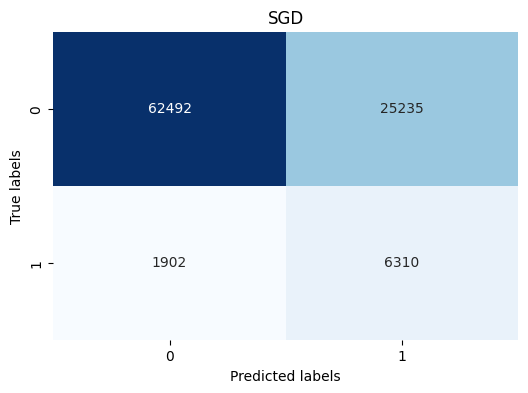

----------------------------------------
 -------------------XGB-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     87727
           1       0.21      0.80      0.34      8212

    accuracy                           0.73     95939
   macro avg       0.59      0.76      0.58     95939
weighted avg       0.91      0.73      0.79     95939



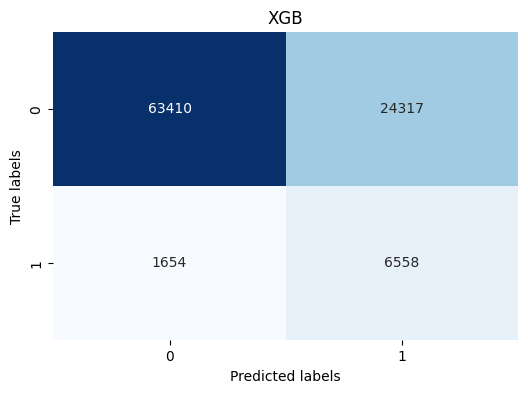

In [33]:
test_models(rUs_x_train, X_test, rUs_y_train, y_test,'RandomUnderSampler')

-  <a >2. Tomeklinks .</a>

> Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.
Tomek’s link exists if the two samples are the nearest neighbors of each other.


In [34]:
TL = TomekLinks(sampling_strategy='majority')

TL_x_train, TL_y_train = TL.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', TL_x_train.shape, " -- ", TL_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'TomekLinks',TL_x_train,TL_y_train)

original dataset shape: (223856, 18)  --  (223856,)
Resample dataset shape (216734, 18)  --  (216734,)


----------------------------------------
 -------------------DT-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87727
           1       0.45      0.12      0.19      8212

    accuracy                           0.91     95939
   macro avg       0.69      0.55      0.57     95939
weighted avg       0.88      0.91      0.89     95939



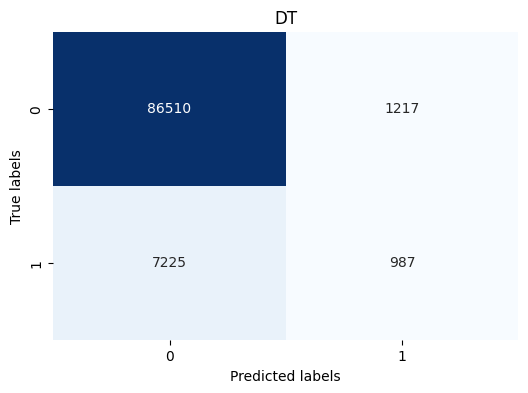

----------------------------------------
 -------------------KNN-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     87727
           1       0.27      0.23      0.25      8212

    accuracy                           0.88     95939
   macro avg       0.60      0.58      0.59     95939
weighted avg       0.87      0.88      0.88     95939



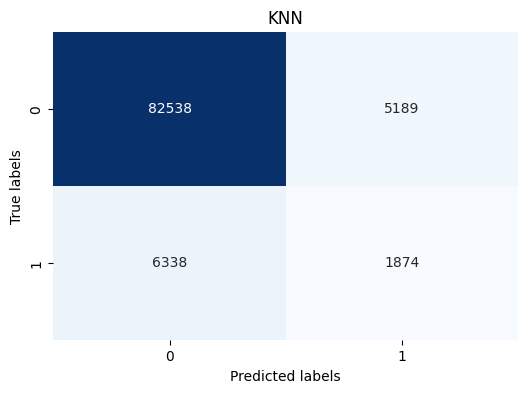

----------------------------------------
 -------------------RF-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87727
           1       0.46      0.14      0.22      8212

    accuracy                           0.91     95939
   macro avg       0.69      0.56      0.58     95939
weighted avg       0.88      0.91      0.89     95939



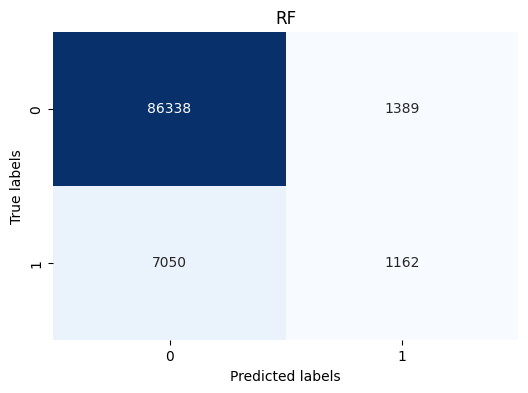

----------------------------------------
 -------------------SGD-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87727
           1       0.48      0.13      0.20      8212

    accuracy                           0.91     95939
   macro avg       0.70      0.56      0.58     95939
weighted avg       0.89      0.91      0.89     95939



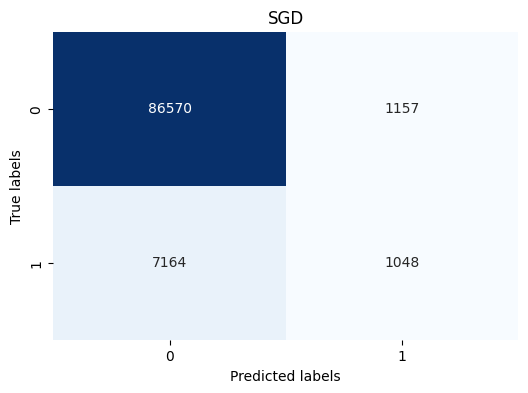

----------------------------------------
 -------------------XGB-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87727
           1       0.50      0.14      0.21      8212

    accuracy                           0.91     95939
   macro avg       0.71      0.56      0.58     95939
weighted avg       0.89      0.91      0.89     95939



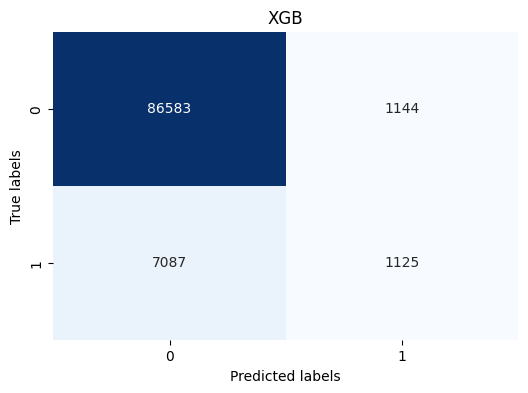

In [35]:
test_models(TL_x_train, X_test, TL_y_train, y_test,'TomekLinks')


-  <a >3. NearMiss.</a>

> NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance will make the majority class equal to the minority class.

-  <a  >4. Balanced Class Weight.</a>


> The undersampling technique removes the majority class data points which results in data loss, whereas upsampling creates artificial data points of the minority class. During the training of machine learning, one can use class_weight parameter to handle the imbalance in the dataset.<br>
Scikit-learn comes with the class_weight parameters for all the machine learning algorithms.

-  <a >5. BalancedBaggingClassifier. </a>

>  When we try to use a usual classifier to classify an imbalanced dataset, the model favors the majority class due to its larger volume presence. A BalancedBaggingClassifier is the same as a sklearn classifier but with additional balancing. It includes an additional step to balance the training set at the time of fit for a given sampler. This classifier takes two special parameters “sampling_strategy” and “replacement”. The sampling_strategy decides the type of resampling required (e.g. ‘majority’ – resample only the majority class, ‘all’ – resample all classes, etc) and replacement decides whether it is going to be a sample with replacement or not.

-  <a  >6. ENN (Edited Nearest Neighbours).</a>
.....



<hr style='color:#696969 ;width:80%' >


<b>2.Over Sampling </b>


> Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.



- <b> Some Functions to apply Oversampling :</b>

-  <a >1. Random Over-Sampling With Imblearn.</a>

> One way to fight imbalanced data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by random sampling with the replacement of the currently available samples.


In [36]:
# Sampling Data
rOs = RandomOverSampler(random_state=42)

rOs_x_train, rOs_y_train = rOs.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', rOs_x_train.shape, " -- ", rOs_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'RandomOverSampler',rOs_x_train,rOs_y_train)

original dataset shape: (223856, 18)  --  (223856,)
Resample dataset shape (409390, 18)  --  (409390,)


----------------------------------------
 -------------------DT-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     87727
           1       0.21      0.78      0.33      8212

    accuracy                           0.73     95939
   macro avg       0.59      0.75      0.58     95939
weighted avg       0.91      0.73      0.79     95939



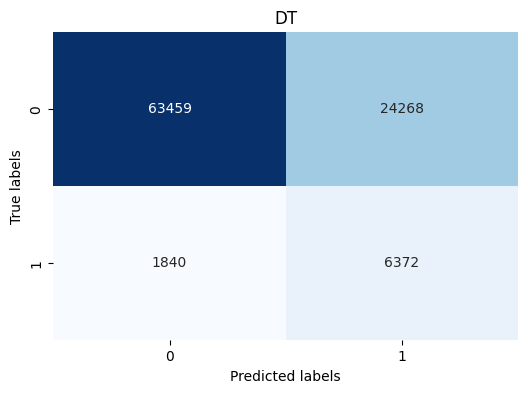

----------------------------------------
 -------------------KNN-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     87727
           1       0.22      0.35      0.27      8212

    accuracy                           0.84     95939
   macro avg       0.58      0.62      0.59     95939
weighted avg       0.88      0.84      0.86     95939



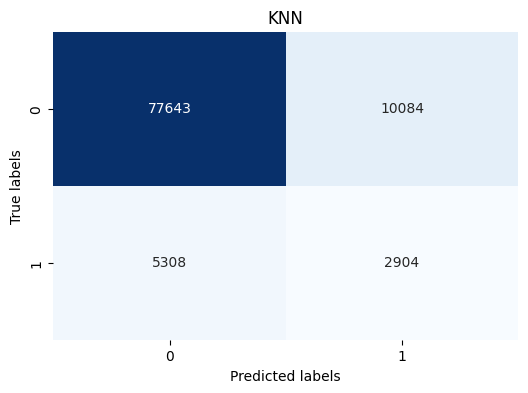

----------------------------------------
 -------------------RF-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.87      0.90     87727
           1       0.26      0.49      0.34      8212

    accuracy                           0.83     95939
   macro avg       0.60      0.68      0.62     95939
weighted avg       0.89      0.83      0.86     95939



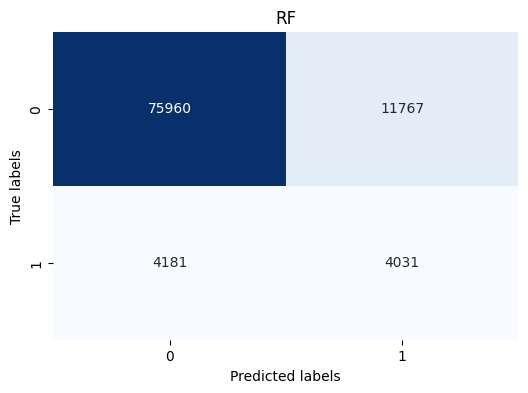

----------------------------------------
 -------------------SGD-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87727
           1       0.21      0.76      0.33      8212

    accuracy                           0.74     95939
   macro avg       0.59      0.75      0.59     95939
weighted avg       0.91      0.74      0.79     95939



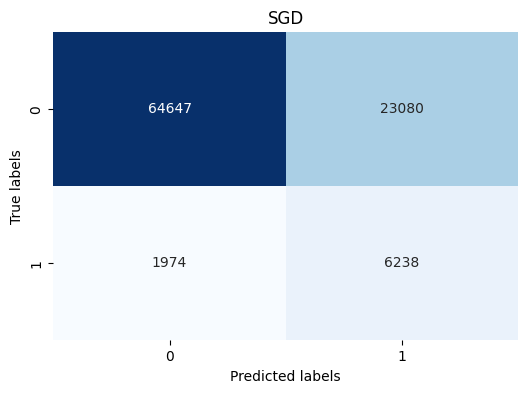

----------------------------------------
 -------------------XGB-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     87727
           1       0.22      0.77      0.34      8212

    accuracy                           0.75     95939
   macro avg       0.60      0.76      0.59     95939
weighted avg       0.91      0.75      0.80     95939



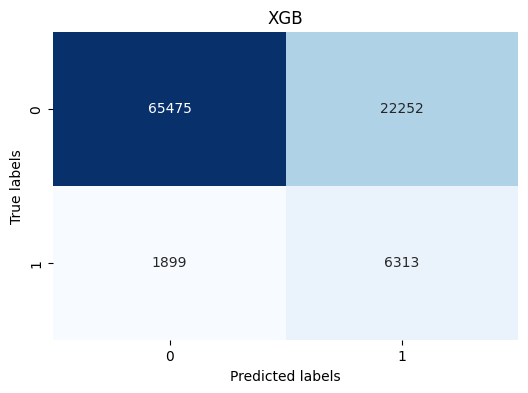

In [37]:
test_models(rOs_x_train, X_test, rOs_y_train, y_test,'RandomOverSampler')


-  <a >2. Synthetic Minority Oversampling Technique (SMOTE) </a>

> This technique generates synthetic data for the minority class.
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
test_models(smote_x_train, X_test, smote_y_train, y_test,'SMOTE')

In [ ]:
smote= SMOTE()

smote_x_train, smote_y_train = smote.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', smote_x_train.shape, " -- ", smote_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'SMOTE',smote_x_train,smote_y_train)

original dataset shape: (223856, 18)  --  (223856,)
Resample dataset shape (409390, 18)  --  (409390,)


----------------------------------------
 -------------------DT-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     87727
           1       0.27      0.47      0.35      8212

    accuracy                           0.85     95939
   macro avg       0.61      0.68      0.63     95939
weighted avg       0.89      0.85      0.86     95939



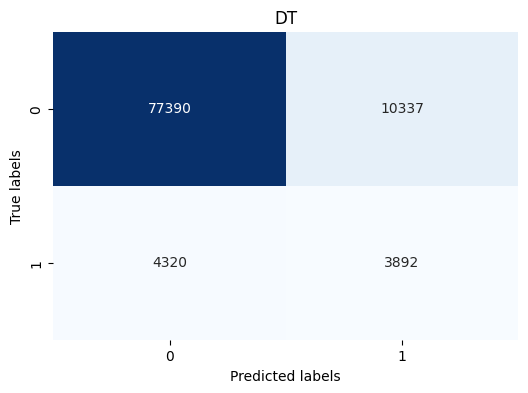

----------------------------------------
 -------------------KNN-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.87      0.91     87727
           1       0.22      0.38      0.28      8212

    accuracy                           0.83     95939
   macro avg       0.58      0.63      0.59     95939
weighted avg       0.88      0.83      0.85     95939



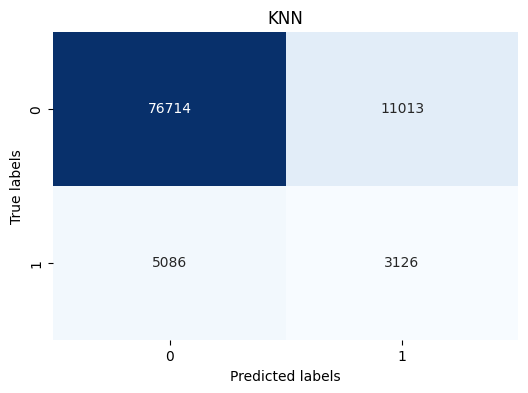

----------------------------------------
 -------------------RF-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     87727
           1       0.32      0.33      0.33      8212

    accuracy                           0.88     95939
   macro avg       0.63      0.63      0.63     95939
weighted avg       0.89      0.88      0.88     95939



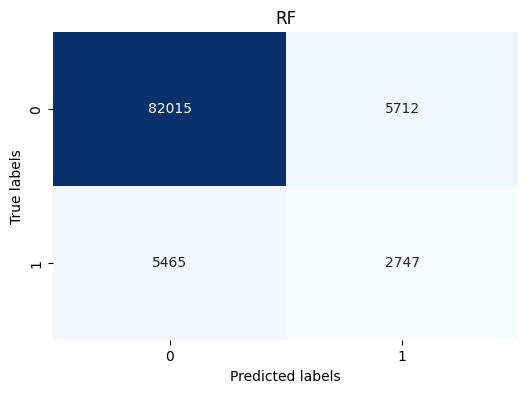

----------------------------------------
 -------------------SGD-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87727
           1       0.21      0.75      0.33      8212

    accuracy                           0.74     95939
   macro avg       0.59      0.75      0.59     95939
weighted avg       0.90      0.74      0.80     95939



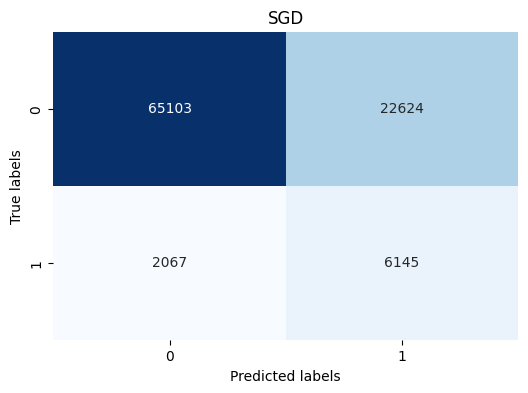

----------------------------------------
 -------------------XGB-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     87727
           1       0.37      0.18      0.24      8212

    accuracy                           0.90     95939
   macro avg       0.65      0.58      0.60     95939
weighted avg       0.88      0.90      0.89     95939



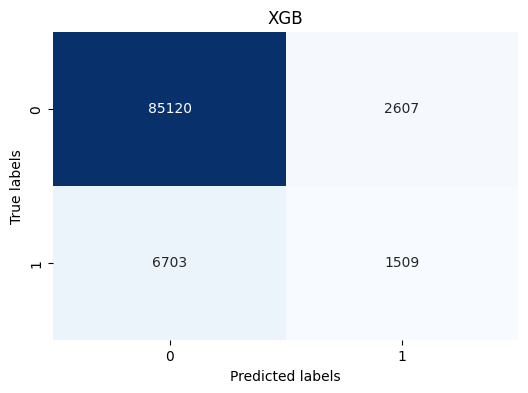

In [ ]:
test_models(smote_x_train, X_test, smote_y_train, y_test,'SMOTE')

<hr style='color:#696969 ;width:80%' >


<b>3.Combine Oversampling and Undersampling Techniques.</b>

>Undersampling techniques is not recommended as it removes the majority class data points. Oversampling techniques are often considered better than undersampling techniques. The idea is to combine the undersampling and oversampling techniques to create a robust balanced dataset fit for model training.
The idea is to first use an oversampling technique to create duplicate and artificial data points and use undersampling techniques to remove noise or unnecessary generated data points.

>Imblearn library comes with the implementation of combined Oversampling and Undersampling techniques such as:<br>
• <b style='color:#A52A2A'>Smote-Tomek</b>: Smote (Oversampler) combined with TomekLinks (Undersampler).<br>
• Smote-ENN: Smote (Oversampler) combined with ENN (Undersampler).<br>

### Smote-Tomek :

In [45]:
smt = SMOTETomek(random_state=42)

smt_x_train, smt_y_train = smt.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', smt_x_train.shape, " -- ", smt_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'SMOTETomek',smt_x_train,smt_y_train)

original dataset shape: (223856, 18)  --  (223856,)
Resample dataset shape (402800, 18)  --  (402800,)


----------------------------------------
 -------------------DT-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     87727
           1       0.27      0.49      0.35      8212

    accuracy                           0.84     95939
   macro avg       0.61      0.68      0.63     95939
weighted avg       0.89      0.84      0.86     95939



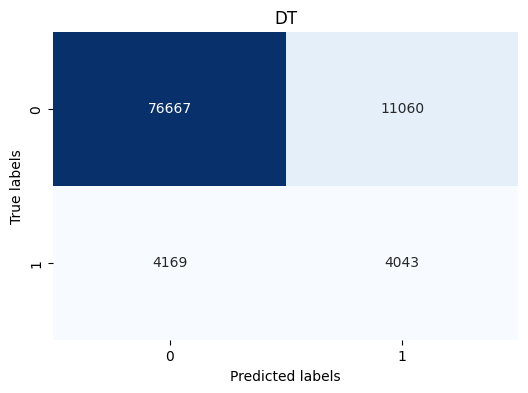

----------------------------------------
 -------------------KNN-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     87727
           1       0.22      0.38      0.28      8212

    accuracy                           0.83     95939
   macro avg       0.58      0.63      0.59     95939
weighted avg       0.88      0.83      0.85     95939



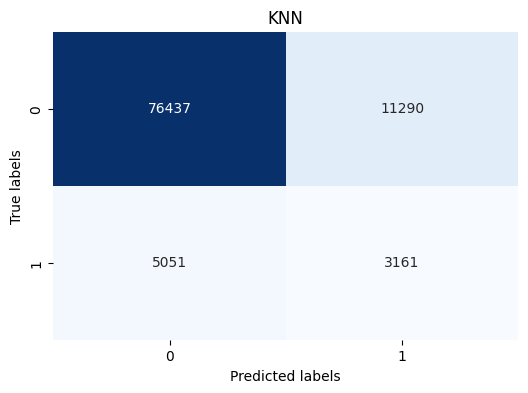

----------------------------------------
 -------------------RF-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     87727
           1       0.32      0.34      0.33      8212

    accuracy                           0.88     95939
   macro avg       0.63      0.63      0.63     95939
weighted avg       0.88      0.88      0.88     95939



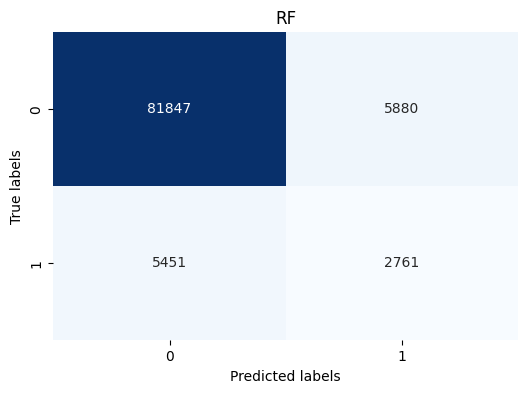

----------------------------------------
 -------------------SGD-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     87727
           1       0.21      0.78      0.33      8212

    accuracy                           0.72     95939
   macro avg       0.59      0.75      0.58     95939
weighted avg       0.91      0.72      0.78     95939



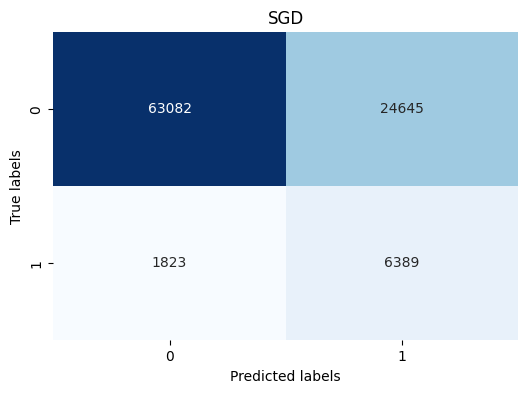

----------------------------------------
 -------------------XGB-------------------
----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     87727
           1       0.37      0.20      0.26      8212

    accuracy                           0.90     95939
   macro avg       0.65      0.58      0.60     95939
weighted avg       0.88      0.90      0.89     95939



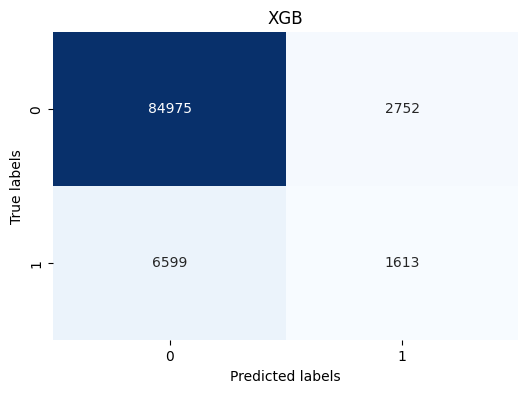

In [46]:
test_models(smt_x_train, X_test, smt_y_train, y_test,'SMOTETomek')

<hr>
<hr>

In [49]:


DataShape_summary = pd.DataFrame(DataShapeHistory_list,columns=['Technique Name','Method Name','X-DataRaw','X_train-DataRaw','Y_train-DataRaw'
, 'X_train-DataSampling','Y_train-DataSampling'])


In [47]:
DataShape_summary.drop([0,1,2])


,Technique Name,Method Name,X-DataRaw,X_train-DataRaw,Y_train-DataRaw,X_train-DataSampling,Y_train-DataSampling


In [50]:

DataShape_summary

,Technique Name,Method Name,X-DataRaw,X_train-DataRaw,Y_train-DataRaw,X_train-DataSampling,Y_train-DataSampling
0,Under Sampling,RandomUnderSampler,319795,223856,95939,38322,38322
1,Under Sampling,TomekLinks,319795,223856,95939,216734,216734
2,Over Sampling,RandomOverSampler,319795,223856,95939,409390,409390
3,Combined Over and Under Sampling,SMOTETomek,319795,223856,95939,402800,402800


In [51]:
MODELS_RESULTS

,Model,Sampling By,Train Score,Test Score,Recall,Precision,f1-score,classification_report
0,DT,Before Sampling,0.918,0.914,6.00,46.82,10.64,precision recall f1-score ...
1,KNN,Before Sampling,0.997,0.889,17.75,27.44,21.56,precision recall f1-score ...
2,RF,Before Sampling,0.963,0.914,9.55,48.04,15.93,precision recall f1-score ...
3,SGD,Before Sampling,0.915,0.915,9.71,51.82,16.35,precision recall f1-score ...
4,XGB,Before Sampling,0.923,0.915,9.55,52.55,16.16,precision recall f1-score ...
5,DT,RandomUnderSampler,0.777,0.713,79.34,20.15,32.13,precision recall f1-score ...
6,KNN,RandomUnderSampler,0.997,0.691,71.88,17.74,28.46,precision recall f1-score ...
7,RF,RandomUnderSampler,0.949,0.718,79.30,20.42,32.47,precision recall f1-score ...
8,SGD,RandomUnderSampler,0.743,0.717,76.84,20.00,31.74,precision recall f1-score ...
9,XGB,RandomUnderSampler,0.815,0.729,79.86,21.24,33.56,precision recall f1-score ...
